In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv(r"C:\Users\Pranav\.cache\kagglehub\datasets\solarmainframe\ids-intrusion-csv\versions\1\02-15-2018.csv")
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign


In [10]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [11]:
df.drop(['Timestamp'], axis=1, inplace=True)

In [12]:
df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,37366762,14,12,2168,2993,712,0,154.857143,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,543,2,0,64,0,64,0,32.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,112640703,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,112640874,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign


In [13]:
df['Label'].value_counts()

Label
Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: count, dtype: int64

In [14]:
# Select columns with object type (which usually indicates strings)
string_columns = df.select_dtypes(include='object')

# Check if there are any string columns
if not string_columns.empty:
    print("DataFrame contains string columns:")
    print(string_columns.columns)
else:
    print("No string columns found.")


DataFrame contains string columns:
Index(['Label'], dtype='object')


In [15]:

# Define the attack and normal patterns
attack_patterns = [
    'DoS attacks-GoldenEye', 'DoS attacks-Slowloris'
]
normal_patterns = ['Benign']

# Replace attack patterns with 1 and normal patterns with 0
df['Label'] = df['Label'].replace(attack_patterns, 1).replace(normal_patterns, 0)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_14864\3411474725.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace(attack_patterns, 1).replace(normal_patterns, 0)


In [16]:
df['Label'].value_counts()

Label
0    996077
1     52498
Name: count, dtype: int64

In [17]:
correlation = df.corr()
correlation = correlation['Label'].sort_values(ascending=False)
correlation = correlation.drop('Label')
correlation

Fwd Seg Size Min     0.482722
Bwd IAT Mean         0.301923
Init Fwd Win Byts    0.268456
Bwd IAT Min          0.250018
Flow IAT Std         0.218583
                       ...   
Fwd Pkts/b Avg            NaN
Fwd Blk Rate Avg          NaN
Bwd Byts/b Avg            NaN
Bwd Pkts/b Avg            NaN
Bwd Blk Rate Avg          NaN
Name: Label, Length: 78, dtype: float64

In [18]:
df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,0
1,22,6,37366762,14,12,2168,2993,712,0,154.857143,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,0
2,47514,6,543,2,0,64,0,64,0,32.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,0
3,0,0,112640703,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,0
4,0,0,112640874,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,0


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('Label', axis=1)
Y = df['Label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [20]:
import numpy as np

# Check for infinite values in X_train and X_test
print("Infinite values in X_train:", np.isinf(X_train).sum())
print("Infinite values in X_test:", np.isinf(X_test).sum())


Infinite values in X_train: Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Active Min       0
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Length: 78, dtype: int64
Infinite values in X_test: Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Active Min       0
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Length: 78, dtype: int64


In [21]:
X_train[np.isinf(X_train)] = np.nan
X_test[np.isinf(X_test)] = np.nan


In [22]:
# Replace NaN values with column means
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train.shape

(702545, 78)

In [25]:
X_test.shape

(346030, 78)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assume you have already preprocessed and split your data into X_train_scaled, X_test_scaled, Y_train, Y_test

# Step 1: Perform Grid Search to find best C and gamma for RBF kernel
param_grid = {
    'C': [10],  # Adjust range based on your dataset
    'gamma': [0.1],  # Try different gamma values
    'kernel': ['rbf']  # Only RBF kernel for now
}

# Initialize the SVM classifier
svm = SVC(C=10, kernel='rbf', gamma=0.1)


svm.fit(X_train, Y_train)

# Step 3: Train and evaluate using the best RBF model
Y_pred_rbf = svm.predict(X_test)
accuracy_rbf = accuracy_score(Y_test, Y_pred_rbf)
print(f"RBF Kernel Accuracy: {accuracy_rbf * 100:.2f}%")
print(classification_report(Y_test, Y_pred_rbf))


RBF Kernel Accuracy: 99.99%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    328816
           1       1.00      1.00      1.00     17214

    accuracy                           1.00    346030
   macro avg       1.00      1.00      1.00    346030
weighted avg       1.00      1.00      1.00    346030



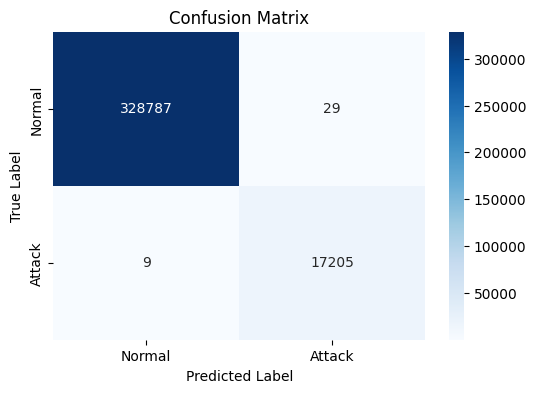

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Step 1: Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_rbf)

# Step 2: Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


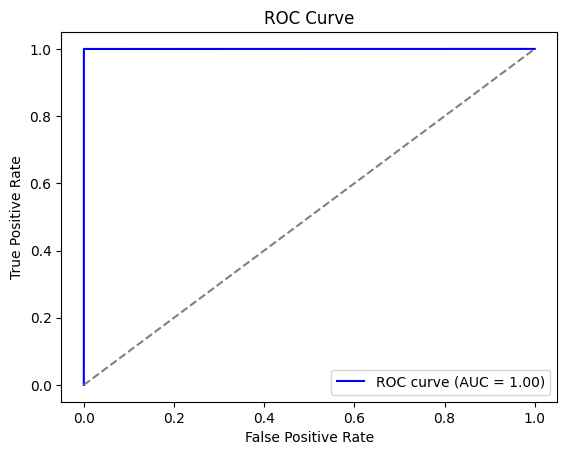

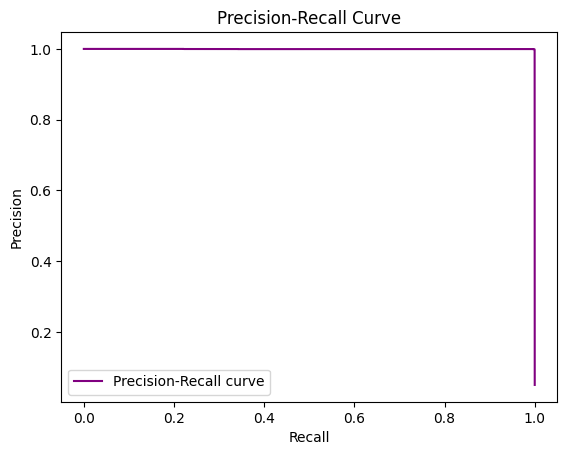

In [28]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

if len(set(Y_test)) == 2:  # Check if it's binary classification
    fpr, tpr, _ = roc_curve(Y_test, svm.decision_function(X_test))
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, svm.decision_function(X_test))
plt.figure()
plt.plot(recall, precision, color="purple", label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

In [23]:
# Step 4: Apply the same best C and gamma to polynomial kernel
# We will try degree 2 and 3 polynomials
svm_poly = SVC(C=10, kernel='poly', gamma=0.1)
svm_poly.fit(X_train, Y_train)

Y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(Y_test, Y_pred_poly)
print(f"Polynomial Kernel Accuracy: {accuracy_poly * 100:.2f}%")
print(classification_report(Y_test, Y_pred_poly))

Polynomial Kernel Accuracy: 99.99%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    328816
           1       1.00      1.00      1.00     17214

    accuracy                           1.00    346030
   macro avg       1.00      1.00      1.00    346030
weighted avg       1.00      1.00      1.00    346030



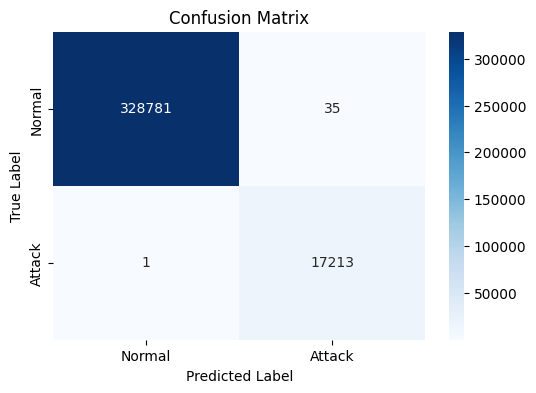

In [24]:
cm = confusion_matrix(Y_test, Y_pred_poly)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Step 7: Train and evaluate using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(classification_report(Y_test, Y_pred_rf))

Random Forest Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    328816
           1       1.00      1.00      1.00     17214

    accuracy                           1.00    346030
   macro avg       1.00      1.00      1.00    346030
weighted avg       1.00      1.00      1.00    346030



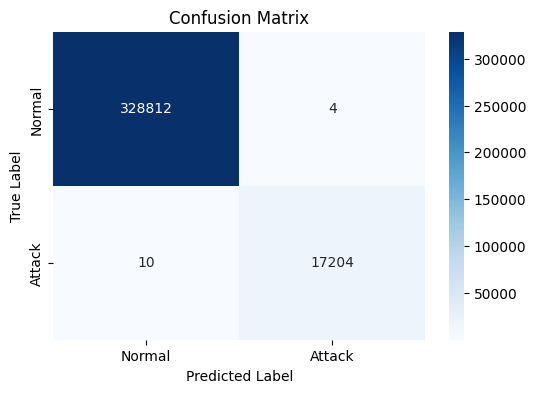

In [28]:
cm = confusion_matrix(Y_test, Y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

# Step 8: Train and evaluate using Logistic Regression
lr = SGDClassifier(loss='log_loss', random_state=42)
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")
print(classification_report(Y_test, Y_pred_lr))

Logistic Regression Accuracy: 99.80%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    328816
           1       0.99      0.97      0.98     17214

    accuracy                           1.00    346030
   macro avg       0.99      0.99      0.99    346030
weighted avg       1.00      1.00      1.00    346030



In [29]:
from sklearn.ensemble import GradientBoostingClassifier

# Step 9: Train and evaluate using Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, Y_train)
Y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(Y_test, Y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%")
print(classification_report(Y_test, Y_pred_gb))

Gradient Boosting Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    328816
           1       1.00      1.00      1.00     17214

    accuracy                           1.00    346030
   macro avg       1.00      1.00      1.00    346030
weighted avg       1.00      1.00      1.00    346030



In [ ]:
import xgboost as xgb

# Step 9: Train and evaluate using XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print(classification_report(Y_test, Y_pred_xgb))

XGBoost Accuracy: 99.88%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4111
           1       1.00      1.00      1.00     36518

    accuracy                           1.00     40629
   macro avg       1.00      1.00      1.00     40629
weighted avg       1.00      1.00      1.00     40629



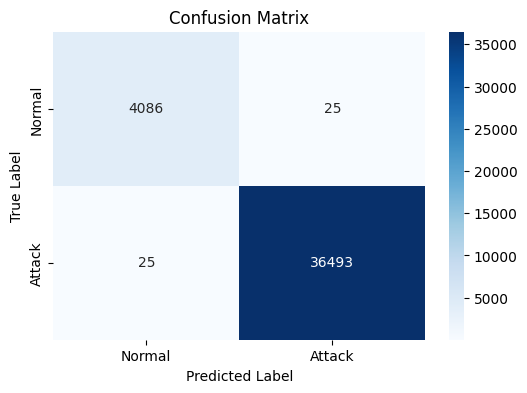

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_xgb)

# Step 2: Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()